In [12]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn import svm
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Warnings
import warnings
warnings.filterwarnings('always', category=FutureWarning)

In [ ]:
# Reading dataset
finance=pd.read_csv("./targetfirm_prediction_dataset_small.csv")
finance.drop(['ca','Unnamed: 0'],axis=1,inplace=True)

In [13]:
# Dropping the rows with more than 50% NaN values and imputing mean for the rest of the rows with less than 50% NaN values
perc=50.0
min_count = int(((100-perc)/100)*finance.shape[1]+1)
finance=finance.dropna(axis=0,thresh=min_count)
for i in finance.columns[finance.isnull().any(axis=0)]:     #---Applying Only on variables with NaN values
    finance[i].fillna(finance[i].mean(),inplace=True)

SVM

In [17]:
# Extract features
X = finance.iloc[:, 3:].values

# Extract target i.e. iris species
Y = finance.loc[:, ['target']].values

# Now using scikit-learn model_selection module, split the iris data into train/test data sets

# keeping 40% reserved for testing purpose and 60% data will be used to train and form model.
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X, Y, test_size=0.3, random_state=0)

# Build an SVC (Support Vector Classification) model using linear regression
clf_ob = svm.SVC(kernel='linear', C=1,probability=True).fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


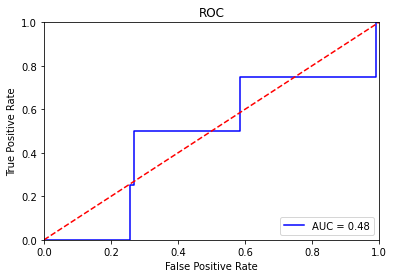

In [20]:
probs = clf_ob.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
print("SVM accuray is:",clf_ob.score(X_test, Y_test))

SVM accuray is: 0.9619047619047619


In [23]:
confusion_matrix = confusion_matrix(Y_test,clf_ob.predict(X_test))
print("Confusion Matrix:\n",confusion_matrix)

Confusion Matrix:
 [[100   1]
 [  3   1]]


In [26]:
# Predict class labels on training data
from sklearn.metrics import classification_report
pred_labels_tr = (clf_ob.predict(X_train) > 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (clf_ob.predict(X_test) > 0.5).astype(int)
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(Y_train, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(Y_test, pred_labels_te))
print("")


---------- Evaluation on Training Data ----------
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       237
         1.0       1.00      0.62      0.77         8

    accuracy                           0.99       245
   macro avg       0.99      0.81      0.88       245
weighted avg       0.99      0.99      0.99       245


---------- Evaluation on Test Data ----------
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       101
         1.0       0.50      0.25      0.33         4

    accuracy                           0.96       105
   macro avg       0.74      0.62      0.66       105
weighted avg       0.95      0.96      0.96       105


